In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

matplotlib.rcParams['figure.figsize'] = (12, 9)
matplotlib.rcParams.update({'font.size': 18})

### Eigenvalue and solve linear system

In [2]:
A = np.array([[1,0,-0.9,0],[0,1,0,-0.9],[0,0,1,-0.9],[0,-0.9,0,1]])
A

array([[ 1. ,  0. , -0.9,  0. ],
       [ 0. ,  1. ,  0. , -0.9],
       [ 0. ,  0. ,  1. , -0.9],
       [ 0. , -0.9,  0. ,  1. ]])

In [3]:
np.linalg.eig(A)

(array([1. , 1. , 1.9, 0.1]),
 array([[ 1.00000000e+00,  1.00000000e+00, -5.00000000e-01,
          5.00000000e-01],
        [ 0.00000000e+00,  0.00000000e+00,  5.00000000e-01,
          5.00000000e-01],
        [ 0.00000000e+00,  2.46716228e-16,  5.00000000e-01,
          5.00000000e-01],
        [ 0.00000000e+00,  0.00000000e+00, -5.00000000e-01,
          5.00000000e-01]]))

In [4]:
A = np.array([[1,0,-0.9,0],[0,1,0,-0.9],[0,0,1,-0.9],[0,-0.9,0,1]])
c = np.array([0,0.1,0,1])
np.linalg.solve(A,c)

array([4.64684211, 5.26315789, 5.16315789, 5.73684211])

### Optimal control
* y[0] refers to $\lambda$
* y[1] refers to y

In [5]:
from scipy.integrate import solve_bvp

In [6]:
def fun(x, y):
    eq1 = y[0] + y[1]
    eq2 = y[0] - y[1]
    return np.vstack((eq1, eq2))

def bc(ya, yb):
    # ya[1] initial val of y = 1
    # yb[0] terminal val of lambda = 0
    return np.array([ya[1] - 1, yb[0] - 0])

x = np.linspace(0, 1, 100)
y = np.zeros((2, x.size))
res = solve_bvp(fun, bc, x, y)

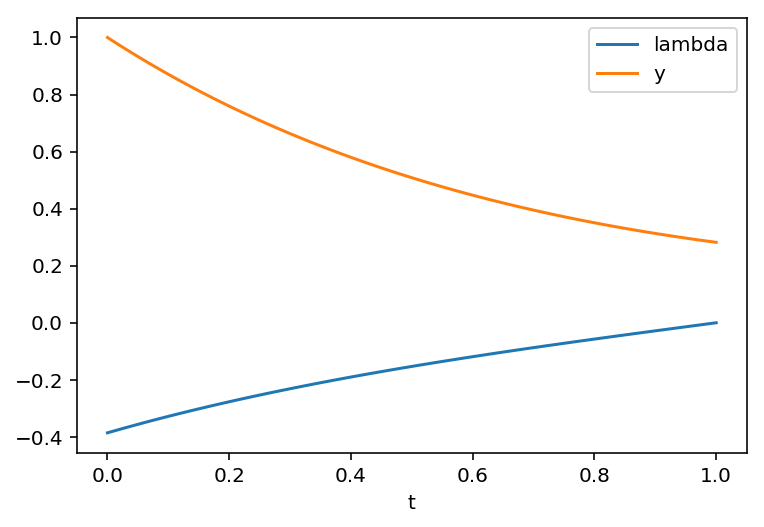

In [7]:
x_plot = np.linspace(0, 1, 100)

[la_plot, y_plot] = res.sol(x_plot)

plt.plot(x_plot, la_plot, label='lambda')
plt.plot(x_plot, y_plot, label='y')
plt.legend()
plt.xlabel("t")
plt.show()